In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.array([0.150,0.100,0.098,0.079,0.050,0.040,0.039,0.032,0.020,0.016,0.010,0.005])
y = np.array([3.81, 2.54, 2.5, 2.0, 1.27, 1.02,1.00, 0.8, 0.5, 0.4, 0.25, 0.13])



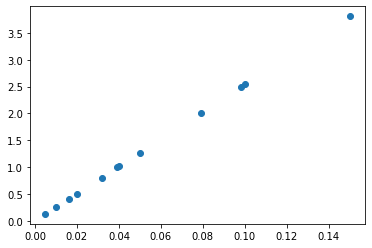

In [6]:
plt.scatter(x,y)

In [7]:
# Simple Linear regression using matrix inversion method (theta = inverse(A).B)
A = np.array([[len(x) , np.sum(x)],[np.sum(x) , np.sum(np.square(x))]])
B = np.array([[np.sum(y)],[np.sum(np.dot(x,y))]])

In [8]:
theta = np.dot(np.linalg.inv(A),B)

In [9]:
theta

array([[-3.16340335e-03],
       [ 2.54428182e+01]])

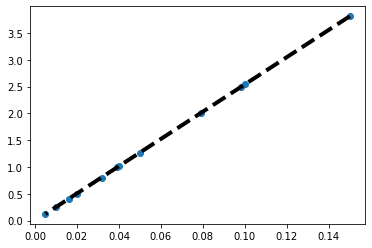

In [10]:
line = theta[1]*x + theta[0]
plt.scatter(x,y)
plt.plot(x,line,'k--',lw=4)
plt.show()

In [12]:
## Gradient Descent ##

In [11]:
# Adding a row of ones as additional feature, along with other features. 
# These ones will get mutiplied to bias value that is c or theta_0

# Reshaping the arrays
x = x.reshape(12,1)
y = y.reshape(12,1)

x = np.append(np.ones((len(x),1)),x,axis=1)

In [12]:
x

array([[1.   , 0.15 ],
       [1.   , 0.1  ],
       [1.   , 0.098],
       [1.   , 0.079],
       [1.   , 0.05 ],
       [1.   , 0.04 ],
       [1.   , 0.039],
       [1.   , 0.032],
       [1.   , 0.02 ],
       [1.   , 0.016],
       [1.   , 0.01 ],
       [1.   , 0.005]])

In [13]:
# In gradient descent we minimize the cost to find the values of parameters.
# defining a cost function

def costFunction(X,Y,Theta):
    J = (1/(2*len(X)))*(np.sum(((np.dot(X,Theta))-Y)**2))
    return J

In [14]:
# Initializing some values before implementing the Gradient descent algorithm

alpha = 0.1
stopping_criteria = 1e-6

# Empty list for storing value of cost function at each iteration with the newly calculated papameters

cost=[]

In [15]:
# Gradient Descent algo

def gradientDescent(X,Y,Theta,alpha,stop_criteria):
    # Calculating the cost value with initialized values of parameters
    c = costFunction(X,Y,Theta)
    # Finding new theta values till the change in cost function is less than decided stopping criteria
    while True:
        Theta = Theta - (alpha/len(x))*(np.dot(np.transpose(X),((np.dot(X,Theta))-Y)))
        # In the above line represents the hypothesis function or we can say predicted values,
        # ((np.dot(X,Theta))-Y) this represents the difference in predicted and actual values
        # (np.dot(np.transpose(X),((np.dot(X,Theta))-Y))) here np.transpose(X) is the matrix that was to be multiplied in the end
        # but here to calculate the dot product and match the dimensions it is written before hand
        
        # Calculating cost values with newly calculated theta
        new_cost = costFunction(X,Y,Theta)
        # Storing the cost value in pre-initialized list
        cost.append(new_cost)
        # Repeating the steps until the change in cost value is less than decided stopping criteria
        if (abs(new_cost-c)<=(stopping_criteria)):
            break
        # update the value of c with new cost for comparing in the next iteration
        c = new_cost
    # Finally return the values of calculated parameters (theta)
    return Theta

In [16]:
# Initializing values of parameters with 0
theta = np.zeros((2,1))

In [17]:
# Now updating the values of theta using gradient descent
theta = gradientDescent(x,y,theta,alpha,stopping_criteria)

In [18]:
theta

array([[ 0.09004935],
       [23.69550688]])

Text(0, 0.5, 'Loss')

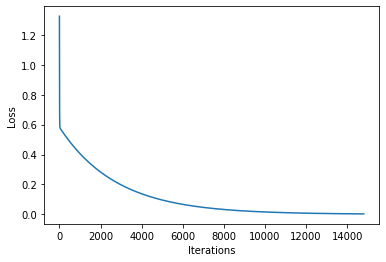

In [19]:
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

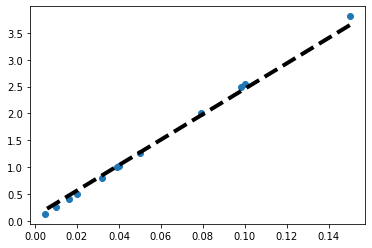

In [20]:
line = theta[1]*x[:,1] + theta[0]  # Here x[:,1] considers 2 column of x because first column contains the extra added ones
plt.scatter(x[:,1],y)
plt.plot(x[:,1],line,'k--',lw=4)
plt.show()

In [21]:
line

array([3.64437538, 2.45960004, 2.41220902, 1.96199439, 1.27482469,
       1.03786963, 1.01417412, 0.84830557, 0.56395949, 0.46917746,
       0.32700442, 0.20852688])

**Don't Forget to restart the kernel and clear outputs before you re-run any cell, else you may get dimensionality error** 

**You must also add maximum number or iterations as an argument in gradient descent function because in case of over shooting the algorithm may get stuck in infinite loop**